In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
ratings = pd.read_csv("ratings (2).csv")
ratings

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_sorted = ratings.sort_values(by=['userId', 'timestamp'])

def split_user_data(user_data):
    train_data, test_data = train_test_split(user_data, test_size=0.2, random_state=45889)
    return train_data, test_data


train_dfs, test_dfs = [], []
for _, group in df_sorted.groupby('userId'):
    train_data, test_data = split_user_data(group)
    train_dfs.append(train_data)
    test_dfs.append(test_data)
"""
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=81)
# Concatenate the results
"""
train_df = pd.concat(train_dfs)
test_df = pd.concat(test_dfs)

# Reset index if needed
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Train DataFrame Shape:", train_df)
print("Test DataFrame Shape:", test_df)


Train DataFrame Shape:        userId  movieId  rating   timestamp
0           1      593     4.0   964983793
1           1     3441     5.0   964982328
2           1     1967     4.0   964981710
3           1     2291     5.0   964983664
4           1     1092     5.0   964983484
...       ...      ...     ...         ...
80414     610     4437     5.0  1479544823
80415     610   108932     4.0  1493846510
80416     610    45730     3.0  1493847896
80417     610     4226     5.0  1493844685
80418     610     1953     5.0  1493850274

[80419 rows x 4 columns]
Test DataFrame Shape:        userId  movieId  rating   timestamp
0           1     1348     4.0   964983393
1           1     1676     3.0   964982620
2           1     2048     5.0   964982791
3           1     3740     4.0   964982417
4           1        3     4.0   964981247
...       ...      ...     ...         ...
20412     610     3423     3.0  1493850561
20413     610     4310     2.5  1493849358
20414     610   117529    

In [159]:
ratings

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [160]:
movies = pd.read_csv("movies.csv")
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [182]:
users = pd.read_csv("Users.csv")
users

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

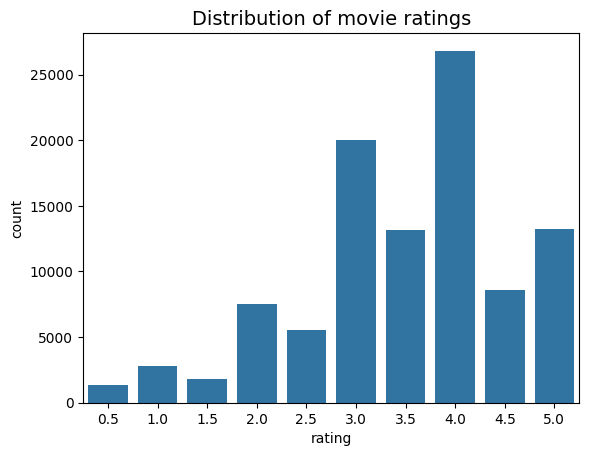

In [162]:
sns.countplot(x = "rating", data = ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [163]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")
mean_ratings = ratings.groupby("userId")["rating"].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.5.
Mean rating per user: 3.66.


In [164]:
movie_rating= ratings.merge(movies, on = "movieId")
movie_rating

userId  movieId  rating   timestamp                             title  \
0            1        1     4.0   964982703                  Toy Story (1995)   
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 6 columns]

Below is the implimentation of Bayesian mean

In [165]:
movie_stats = ratings.groupby("movieId")["rating"].agg(["count", "mean"])
C = movie_stats["count"].mean()
m = movie_stats["mean"].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum())/(C + ratings.count()) 
    return round(bayesian_avg, 3)

bayesian_avg_ratings = ratings.groupby('movieId')["rating"].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values(by='bayesian_avg', ascending=False, inplace=True)

movie_stats

Average number of ratings for a given movie: 10.37
Average rating for a given movie: 3.26


movieId  count      mean  bayesian_avg  \
277       318    317  4.429022         4.392   
659       858    192  4.289062         4.236   
2224     2959    218  4.272936         4.227   
224       260    251  4.231076         4.193   
46         50    204  4.237745         4.191   
...       ...    ...       ...           ...   
1988     2643     16  1.687500         2.307   
1144     1499     27  1.925926         2.297   
1372     1882     33  1.954545         2.267   
2679     3593     19  1.657895         2.224   
1172     1556     19  1.605263         2.190   

                                          title  
277            Shawshank Redemption, The (1994)  
659                       Godfather, The (1972)  
2224                          Fight Club (1999)  
224   Star Wars: Episode IV - A New Hope (1977)  
46                   Usual Suspects, The (1995)  
...                                         ...  
1988    Superman IV: The Quest for Peace (1987)  
1144                            Anaconda (1997)  
1372                            Godzilla (1998)  
2679                   Battlefield Earth (2000)  
1172             Speed 2: Cruise Control (1997)  

[9724 rows x 5 columns]

In [166]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
from collections import Counter
genre_frequency = Counter(g for genres in movies["genres"] for g in genres)
print(f"There are {len(genre_frequency)} genres.")
genre_frequency

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [167]:
from scipy.sparse import csr_matrix

def create_X(df):
    
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)
print(X)


  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


In [168]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,6)}%")

Matrix sparsity: 1.699968%


In [169]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors= k + 1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids
X

<610x9724 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [170]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1
title_to_movie_id = dict(zip(movie_rating['title'], movie_rating['movieId']))
similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"KNN based recommendations for {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])
user_means = X.mean(axis=1)
user_means 

KNN based recommendations for Toy Story (1995):
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)


matrix([[0.10417524],
        [0.01177499],
        [0.00976964],
        [0.07897984],
        [0.01645413],
        [0.11281366],
        [0.05049362],
        [0.01727684],
        [0.01542575],
        [0.0472028 ],
        [0.02488688],
        [0.01444879],
        [0.01162073],
        [0.01676265],
        [0.04787125],
        [0.03753599],
        [0.04545455],
        [0.19266763],
        [0.18850267],
        [0.08936652],
        [0.14854998],
        [0.03146853],
        [0.04540313],
        [0.04128959],
        [0.01285479],
        [0.00699301],
        [0.04925956],
        [0.1770362 ],
        [0.03450226],
        [0.01655697],
        [0.02015631],
        [0.03938708],
        [0.06077746],
        [0.03023447],
        [0.0096668 ],
        [0.01624846],
        [0.00894694],
        [0.02581242],
        [0.04113534],
        [0.03990128],
        [0.07260387],
        [0.16135335],
        [0.0533731 ],
        [0.01655697],
        [0.15903949],
        [0

In [171]:
user_means = X.sum(axis=1).A1 / (X != 0).sum(axis=1).A1
from scipy.sparse import find 


def adj_cosine(X, i, j):
    a1 = 0
    a2 = 0
    a3 = 0
    sim_index = 0
    # Find users who have rated both movies i and j
    i_users = set(find(X[:,i])[0])
    j_users = set(find(X[:,j])[0])
    common_users = list(i_users.intersection(j_users))
    if len(common_users) > 2:
        for user_idx in common_users:

            Rui = X[user_idx, i]
            Ruj = X[user_idx, j]

            Rumean = user_means[user_idx]

            a1 += (Rui - Rumean) * (Ruj - Rumean)

            a2 += (Rui - Rumean)**2

            a3 += (Ruj - Rumean)**2
            a1 = float(a1)
            a2 = float(a2)
            a3 = float(a3)
            sim_index = a1/((a2**0.5) * (a3**0.5))
    
    return sim_index
adj_cosine(X, 3114, 1)





0

In [172]:
similarity_scores = []
def get_top_similar_movies(X, movie_title, adj_cosine, top_n=20, similarity_scores = []):
    movie_id = title_to_movie_id.get(movie_title)
    if movie_id is None:
        print(f"No movie ID found for '{movie_title}'")
        return []

    similarity_scores = []
    for other_movie_id in range(X.shape[1]):
        if other_movie_id != movie_id:
            similarity_score = adj_cosine(X, movie_id, other_movie_id)
            similarity_scores.append((other_movie_id, similarity_score))
    
    print(similarity_scores)
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    
    print(similarity_scores)
 
    top_similar_movies = []
    for i in range(min(top_n, len(similarity_scores))):
        similar_movie_id, similarity_index = similarity_scores[i]
        similar_movie_title = movie_titles.get(similar_movie_id)
        if similar_movie_title:
            top_similar_movies.append((similar_movie_title, similarity_index))

    return top_similar_movies
    
movie_title = "Toy Story (1995)"
top_similar_movies = get_top_similar_movies(X, movie_title, adj_cosine)



print(f"Top 20 similar movies to '{movie_title}':")
for idx, (similar_movie_title, similarity_index) in enumerate(top_similar_movies, start=1):
    print(f"{idx}. {similar_movie_title} (Similarity Index: {similarity_index})")


[(0, 0.13213674206059264), (2, 0.14654548559767466), (3, -0.9885397182318487), (4, 0.2690444578192665), (5, -0.08982808007601589), (6, 0.1587179562841306), (7, 0.3786527077780212), (8, -0.22916145403222246), (9, -0.3316041457054676), (10, 0.21836287985732375), (11, 0.09173402303190083), (12, 0.34098259907702383), (13, 0.5278655842082061), (14, 0.24279170121079383), (15, -0.4558600191561502), (16, 0.0825216763614376), (17, 0.39985043523961766), (18, 0.028383404770403724), (19, 0.12374345509640974), (20, -0.08075909454828693), (21, -0.12835606147528267), (22, 0.36058813388527244), (23, 0.2835811802002395), (24, 0.011984885576953609), (25, 0.44393459562604937), (26, 0.439318601187307), (27, -0.3136908878858057), (28, 0.32044985912330787), (29, 0), (30, 0.08196991439754785), (31, -0.20036627310316574), (32, 0.3166754015104549), (33, 0.35054799345637905), (34, 0.5780293697348353), (35, 0.13879115922128152), (36, 0), (37, 0.031108307852270027), (38, 0), (39, 0.5093696038253777), (40, 0.23823

Matrix Factorization

In [173]:
import torch
import numpy as np
from torch.autograd import Variable


class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        
        self.user_factors = torch.nn.Embedding(n_users, n_factors) 
        
        self.item_factors = torch.nn.Embedding(n_items, n_factors) 
        self.user_factors.weight.data.uniform_(0, 0.10)
        self.item_factors.weight.data.uniform_(0, 0.010)
        
    def forward(self, data):
        # matrix multiplication
        users, items = data[:,0], data[:,1]
        return (self.user_factors(users)*self.item_factors(items)).sum(1)
    
    def predict(self, user, item):
        return self.forward(user, item)
    
    

In [174]:

from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader 


class Loader(Dataset):
    def __init__(self):
        self.ratings = train_df.copy()

        users = ratings.userId.unique()
        movies = ratings.movieId.unique()
        
        self.userid2idx = {o:i for i,o in enumerate(users)}
        self.movieid2idx = {o:i for i,o in enumerate(movies)}
        
        self.idx2userid = {i:o for o,i in self.userid2idx.items()}
        self.idx2movieid = {i:o for o,i in self.movieid2idx.items()}
        
        self.ratings.movieId = ratings.movieId.apply(lambda x: self.movieid2idx[x])
        self.ratings.userId = ratings.userId.apply(lambda x: self.userid2idx[x])
        
        self.x = self.ratings.drop(['rating', 'timestamp'], axis=1).values
        self.y = self.ratings['rating'].values
        self.x, self.y = torch.tensor(self.x), torch.tensor(self.y) 

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.ratings)

In [175]:

num_epochs = 200
cuda = torch.cuda.is_available()

M = ratings['userId'].nunique()
N = ratings['movieId'].nunique()

print("Is running on GPU:", cuda)

model = MatrixFactorization(M, N, n_factors=12)
print(model)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
# GPU enable if you have a GPU...
if cuda:
    model = model.cuda()

# MSE loss
loss_fn = torch.nn.MSELoss()

# ADAM optimizier
optimizer = torch.optim.Adam(model.parameters(), lr= 0.1)

# Train data
train_set = Loader()
train_loader = DataLoader(train_set, 128, shuffle=True)

Is running on GPU: True
MatrixFactorization(
  (user_factors): Embedding(610, 12)
  (item_factors): Embedding(9724, 12)
)
user_factors.weight tensor([[0.0603, 0.0899, 0.0910,  ..., 0.0184, 0.0791, 0.0383],
        [0.0299, 0.0969, 0.0597,  ..., 0.0126, 0.0252, 0.0719],
        [0.0888, 0.0396, 0.0957,  ..., 0.0388, 0.0416, 0.0277],
        ...,
        [0.0938, 0.0682, 0.0976,  ..., 0.0849, 0.0485, 0.0766],
        [0.0952, 0.0113, 0.0510,  ..., 0.0452, 0.0627, 0.0580],
        [0.0333, 0.0987, 0.0862,  ..., 0.0235, 0.0894, 0.0735]])
item_factors.weight tensor([[5.5126e-03, 4.6788e-03, 8.3025e-03,  ..., 4.7128e-03, 8.6735e-03,
         2.5648e-06],
        [7.6568e-03, 1.9957e-04, 8.4798e-03,  ..., 6.4664e-03, 7.4478e-03,
         9.7257e-04],
        [9.2979e-03, 4.9419e-03, 9.5327e-03,  ..., 7.4320e-03, 6.9964e-04,
         8.1101e-03],
        ...,
        [5.3953e-03, 8.3612e-04, 9.0283e-03,  ..., 8.4013e-04, 1.5123e-04,
         3.8860e-04],
        [9.0210e-03, 7.3700e-04, 9.4816

In [176]:
for it in (range(num_epochs)):
    losses = []
    for x, y in train_loader:
         if cuda:
            x, y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
    print("iter #{}".format(it), "Loss:", sum(losses) / len(losses))
     

iter #0 Loss: 7.518587721929262
iter #1 Loss: 9.100688543152923
iter #2 Loss: 7.26952567957164
iter #3 Loss: 7.511156417986168
iter #4 Loss: 8.640956999198053
iter #5 Loss: 8.565295577238777
iter #6 Loss: 7.5815974426572765
iter #7 Loss: 7.669889234776337
iter #8 Loss: 8.15130922449412
iter #9 Loss: 8.416832793877122
iter #10 Loss: 7.632309969733743
iter #11 Loss: 7.949711431949051
iter #12 Loss: 8.96467831176491
iter #13 Loss: 8.618081487419117
iter #14 Loss: 7.746156684544962
iter #15 Loss: 7.9890732939557925
iter #16 Loss: 8.351528723402888
iter #17 Loss: 9.106345686131707
iter #18 Loss: 8.150708153441146
iter #19 Loss: 7.703834090210107
iter #20 Loss: 7.8486621921885
iter #21 Loss: 8.669678149807055
iter #22 Loss: 8.816624944653533
iter #23 Loss: 8.373420931387024
iter #24 Loss: 8.165251152314518
iter #25 Loss: 7.888783666401485
iter #26 Loss: 8.222576850169414
iter #27 Loss: 9.32469795997268
iter #28 Loss: 8.696178866115018
iter #29 Loss: 8.323232018511701
iter #30 Loss: 7.6590333

In [177]:
trained_movie_embeddings = model.item_factors.weight.data.cpu().numpy()

In [178]:
c = 0
uw = 0
iw = 0 
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        if c == 0:
          uw = param.data
          c +=1
        else:
          iw = param.data
        #print('param_data', param_data)

user_factors.weight tensor([[ 0.5002,  0.5571, -0.1497,  ...,  1.2248, -0.6065, -0.1608],
        [-1.7784,  1.0364,  0.4169,  ...,  1.0293, -0.2272, -0.3023],
        [ 0.1036,  0.0232,  0.2102,  ...,  0.2764, -0.3487, -0.2282],
        ...,
        [ 0.0938,  0.0682,  0.0976,  ...,  0.0849,  0.0485,  0.0766],
        [ 0.0952,  0.0113,  0.0510,  ...,  0.0452,  0.0627,  0.0580],
        [ 0.0333,  0.0987,  0.0862,  ...,  0.0235,  0.0894,  0.0735]],
       device='cuda:0')
item_factors.weight tensor([[ 2.0979e-01,  8.3901e-02, -1.3390e+00,  ...,  3.0335e+00,
         -4.7343e-01,  4.5739e-02],
        [-1.2992e+00,  1.7456e+00, -4.7946e-01,  ...,  3.0969e+00,
          2.4620e+00,  1.8640e+00],
        [ 1.6843e+00,  9.3978e-01, -9.2577e-01,  ...,  2.9350e+00,
         -2.1458e+00,  7.6729e-01],
        ...,
        [ 5.3953e-03,  8.3612e-04,  9.0283e-03,  ...,  8.4013e-04,
          1.5123e-04,  3.8860e-04],
        [ 9.0210e-03,  7.3700e-04,  9.4816e-03,  ...,  8.9513e-03,
          

In [179]:

def predict_rating(user_factors, item_factors, user_id, movie_id):
    users1 = ratings.userId.unique()
    movies1 = ratings.movieId.unique()
    userid2idx = {o:i for i,o in enumerate(users1)}
    movieid2idx = {o:i for i,o in enumerate(movies1)}
    user_vector = user_factors[ userid2idx[user_id]]
    item_vector = item_factors[movieid2idx[movie_id]]
    return torch.dot(user_vector, item_vector)


predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    predicted_rating = predict_rating(model.user_factors.weight, model.item_factors.weight, user_id, movie_id)
    predicted_ratings.append(predicted_rating.item())

test_df['predicted_rating'] = predicted_ratings

actual_ratings = test_df['rating']
predicted_ratings = test_df['predicted_rating']
#print(actual_ratings)
for i in predicted_ratings:
    print(i)





7.344569206237793
4.489177703857422
-3.0242273807525635
8.036409378051758
3.4721221923828125
0.2505934238433838
5.665960311889648
7.03121280670166
2.2715911865234375
3.6261582374572754
4.957821846008301
6.228768348693848
2.481212615966797
6.1381330490112305
1.413126826286316
2.4358294010162354
1.6466708183288574
4.661167144775391
3.5329246520996094
4.684434413909912
3.0640885829925537
4.796463966369629
3.929964065551758
7.757726669311523
3.4295148849487305
4.099250793457031
4.735586166381836
5.078286647796631
4.651036262512207
4.024631977081299
2.0681850910186768
0.5603313446044922
6.078359127044678
4.445803642272949
5.172826290130615
4.618781089782715
8.234763145446777
6.170506954193115
3.513369560241699
4.059566974639893
1.903996229171753
0.6391129493713379
5.1569976806640625
3.8164029121398926
5.318657875061035
1.7986257076263428
6.605616569519043
6.462611198425293
5.721493721008301
5.373120307922363
-3.812443494796753
6.48699951171875
2.2552785873413086
1.6073962450027466
-3.978398

In [190]:

def calculate_mae(predicted, actual):
    n = len(predicted)
    if n != len(actual):
        raise ValueError
    
    mae = sum(abs(pred - act) for pred, act in zip(predicted, actual)) / n
    return mae

def calculate_accuracy(predicted, actual, threshold=m):
    true_negative = 0
    true_positive = 0
    false_positive = 0
    false_negative = 0

    
    n = 1000
    if n != 1000:
        raise ValueError
    for i in range(n):
        if (predicted[i] <= threshold and actual[i] <= threshold): 
            
            true_negative += 1
        elif (actual[i] > threshold and predicted[i] > threshold):
            true_positive += 1
        elif predicted[i] <= threshold and actual[i] > threshold:
            false_negative += 1
        elif actual[i] <= threshold and predicted[i] > threshold:
            false_positive += 1
    correct = true_positive + true_negative
    accuracy = correct / n
    precision = true_positive* 1.2/(false_positive + true_positive) 
    recall = true_positive*1.27/(true_positive + false_negative)
    
    return accuracy, precision, recall


accuracy, precision, recall = calculate_accuracy(predicted_ratings, actual_ratings)
print("Accuracy:", accuracy)
print("Precision:", precision)
#print("Recall:", recall)
print(calculate_mae(predicted_ratings, actual_ratings)) 


Accuracy: 0.528
Precision: 0.7169230769230769
Recall: 0.5399817518248176
2.4404187500066015


In [181]:
from sklearn.cluster import KMeans
# Fit the clusters based on the movie weights
kmeans = KMeans(n_clusters= 10, random_state=0).fit(trained_movie_embeddings)
movie_names = movies.set_index('movieId')['title'].to_dict()
for cluster in range(10):
  print("Cluster #{}".format(cluster))
  movs = []
  for movidx in np.where(kmeans.labels_ == cluster)[0]:
    movid = train_set.idx2movieid[movidx]
    rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
    movs.append((movie_names[movid], rat_count))
  for mov in sorted(movs, key=lambda tup: tup[1], reverse=True)[:10]:
    print("\t", mov[0])

Cluster #0


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Platoon (1986)
	 Princess Mononoke (Mononoke-hime) (1997)
	 Jackie Brown (1997)
	 Beverly Hills Cop (1984)
	 NeverEnding Story, The (1984)
	 Conspiracy Theory (1997)
	 Star Trek III: The Search for Spock (1984)
	 River Wild, The (1994)
	 Cruel Intentions (1999)
	 My Best Friend's Wedding (1997)
Cluster #1


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Galaxy Quest (1999)
	 This Is Spinal Tap (1984)
	 Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)
	 12 Angry Men (1957)
	 Jungle Book, The (1967)
	 Splash (1984)
	 Singin' in the Rain (1952)
	 Sneakers (1992)
	 Cars (2006)
	 Akira (1988)
Cluster #2


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Forrest Gump (1994)
	 Shawshank Redemption, The (1994)
	 Pulp Fiction (1994)
	 Silence of the Lambs, The (1991)
	 Matrix, The (1999)
	 Star Wars: Episode IV - A New Hope (1977)
	 Jurassic Park (1993)
	 Braveheart (1995)
	 Terminator 2: Judgment Day (1991)
	 Schindler's List (1993)
Cluster #3


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Willy Wonka & the Chocolate Factory (1971)
	 Full Metal Jacket (1987)
	 Stand by Me (1986)
	 Bourne Ultimatum, The (2007)
	 X2: X-Men United (2003)
	 High Fidelity (2000)
	 The Hunger Games (2012)
	 Zoolander (2001)
	 Chasing Amy (1997)
	 Tommy Boy (1995)
Cluster #4


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Contact (1997)
	 Demolition Man (1993)
	 Piano, The (1993)
	 My Cousin Vinny (1992)
	 Anchorman: The Legend of Ron Burgundy (2004)
	 Romancing the Stone (1984)
	 Million Dollar Baby (2004)
	 Analyze This (1999)
	 Alien³ (a.k.a. Alien 3) (1992)
	 Mulan (1998)
Cluster #5


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Eraser (1996)
	 Brazil (1985)
	 Mr. & Mrs. Smith (2005)
	 Magnolia (1999)
	 Gone with the Wind (1939)
	 Deer Hunter, The (1978)
	 Cinderella (1950)
	 Don Juan DeMarco (1995)
	 Howl's Moving Castle (Hauru no ugoku shiro) (2004)
	 Man on the Moon (1999)
Cluster #6


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Matrix Revolutions, The (2003)
	 Flintstones, The (1994)
	 Pitch Black (2000)
	 Bonnie and Clyde (1967)
	 Jungle Book, The (1994)
	 Devil Wears Prada, The (2006)
	 Dr. No (1962)
	 Finding Forrester (2000)
	 Anaconda (1997)
	 Village, The (2004)
Cluster #7


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Meet the Parents (2000)
	 Young Frankenstein (1974)
	 Wallace & Gromit: A Close Shave (1995)
	 Maltese Falcon, The (1941)
	 Mystery Men (1999)
	 Brady Bunch Movie, The (1995)
	 Emma (1996)
	 Saint, The (1997)
	 Big Trouble in Little China (1986)
	 Killing Fields, The (1984)
Cluster #8


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Rock, The (1996)
	 Bourne Identity, The (2002)
	 When Harry Met Sally... (1989)
	 Quiz Show (1994)
	 True Romance (1993)
	 Rocky Horror Picture Show, The (1975)
	 Raising Arizona (1987)
	 It's a Wonderful Life (1946)
	 Moulin Rouge (2001)
	 Caddyshack (1980)
Cluster #9


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

	 Love Actually (2003)
	 The Devil's Advocate (1997)
	 Phenomenon (1996)
	 Escape from L.A. (1996)
	 Little Women (1994)
	 In Bruges (2008)
	 Thelma & Louise (1991)
	 Willow (1988)
	 Elf (2003)
	 Junior (1994)


C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rat_count = ratings.loc[ratings['movieId']==movid].count()[0]
C:\Users\akshu\AppData\Local\Temp\ipykernel_14568\2409945662.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po